Importing required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

Reading the dataset

In [4]:
chatgpt = pd.read_csv("/content/chatgpt_twitter_jan_mar.csv", engine='python', on_bad_lines='skip')

Analysing the dataset

In [5]:
chatgpt.head()

,date,id,content,username,like_count,retweet_count
0,2023-03-29 22:58:21+00:00,1.641213e+18,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0
1,2023-03-29 22:58:18+00:00,1.641213e+18,@MecoleHardman4 Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0
2,2023-03-29 22:57:53+00:00,1.641213e+18,https://t.co/FjJSprt0te - Chat with any PDF!\n...,yjleon1976,0.0,0.0
3,2023-03-29 22:57:52+00:00,1.641213e+18,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0
4,2023-03-29 22:57:26+00:00,1.641213e+18,Most people haven't heard of Chat GPT yet.\nFi...,nikocosmonaut,0.0,0.0


In [6]:
print(chatgpt.shape)

(21584, 6)


# Data Cleaning
Removing redundant columns

In [7]:
chatgpt.drop(['date','id','username','like_count','retweet_count'], axis=1, inplace=True)
chatgpt.head()

,content
0,"Free AI marketing and automation tools, strate..."
1,@MecoleHardman4 Chat GPT says it’s 15. 😂
2,https://t.co/FjJSprt0te - Chat with any PDF!\n...
3,"AI muses: ""In the court of life, we must all f..."
4,Most people haven't heard of Chat GPT yet.\nFi...


Removing data with no entries

In [8]:
chatgpt.info()
chatgpt.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21584 entries, 0 to 21583
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  21583 non-null  object
dtypes: object(1)
memory usage: 168.8+ KB


content    1
dtype: int64

In [9]:
chatgpt = chatgpt.dropna()
chatgpt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21583 entries, 0 to 21582
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  21583 non-null  object
dtypes: object(1)
memory usage: 337.2+ KB


# Text Processing
Using regex function to remove special characters

In [10]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
def data_processing(content):
    content = content.lower()                                                           #converting to lowercase
    content = re.sub(r'[^\w\s]','',content)                                             #removing punctuations
    content = re.sub(r'\@w+|\#','',content)                                             #removing hashtags
    content_tokens = word_tokenize(content)
    filtered_content = [w for w in content_tokens if not w in stop_words]               #removing stopwords
    content = re.sub(r"https\S+|www\S+https\S+", '',content, flags=re.MULTILINE)        #removing urls
    return " ".join(filtered_content)

In [12]:
chatgpt.content = chatgpt['content'].apply(data_processing)
chatgpt = chatgpt.drop_duplicates('content')

Stemming words

In [13]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [14]:
chatgpt['content'] = chatgpt['content'].apply(lambda x: stemming(x))
chatgpt.head()

,content
0,free ai marketing automation tools strategies ...
1,mecolehardman4 chat gpt says 15
2,httpstcofjjsprt0te chat pdf check new ai quick...
3,ai muses court life must face judge destiny ju...
4,people havent heard chat gpt yet first elite f...


In [15]:
chatgpt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21361 entries, 0 to 21582
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  21361 non-null  object
dtypes: object(1)
memory usage: 333.8+ KB


Using textblob to calculate polarity

In [16]:
from textblob import TextBlob

In [17]:
def polarity(content):
    return TextBlob(content).sentiment.polarity

In [18]:
chatgpt['polarity'] = chatgpt['content'].apply(polarity)
chatgpt.head()

,content,polarity
0,free ai marketing automation tools strategies ...,0.268182
1,mecolehardman4 chat gpt says 15,0.000000
2,httpstcofjjsprt0te chat pdf check new ai quick...,0.342424
3,ai muses court life must face judge destiny ju...,0.000000
4,people havent heard chat gpt yet first elite f...,0.041667


In [19]:
def sentiment(polarity):
    if polarity > 0:
      return "Positive"
    elif polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"

In [20]:
chatgpt['sentiment'] = chatgpt['polarity'].apply(sentiment)
chatgpt.head(15)

,content,polarity,sentiment
0,free ai marketing automation tools strategies ...,0.268182,Positive
1,mecolehardman4 chat gpt says 15,0.000000,Neutral
2,httpstcofjjsprt0te chat pdf check new ai quick...,0.342424,Positive
3,ai muses court life must face judge destiny ju...,0.000000,Neutral
4,people havent heard chat gpt yet first elite f...,0.041667,Positive
5,nytimes chat gpt putting together amazing recipes,0.600000,Positive
6,ylzkrtt yes also chat gpt make generative art ...,0.433333,Positive
7,robinhanson razibkhan people havent heard chat...,0.041667,Positive
8,robotically shaun usher letters note think cha...,0.500000,Positive
9,metaphor limited perception reality many peopl...,0.214286,Positive


# Visualization

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

<Axes: xlabel='sentiment', ylabel='count'>

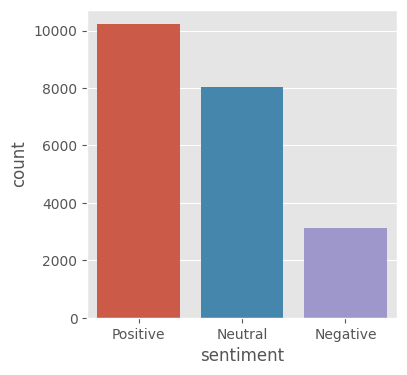

In [22]:
fig = plt.figure(figsize=(4,4))
sns.countplot(x='sentiment', data = chatgpt)

Text(0.5, 1.0, 'Distribution of Sentiments')

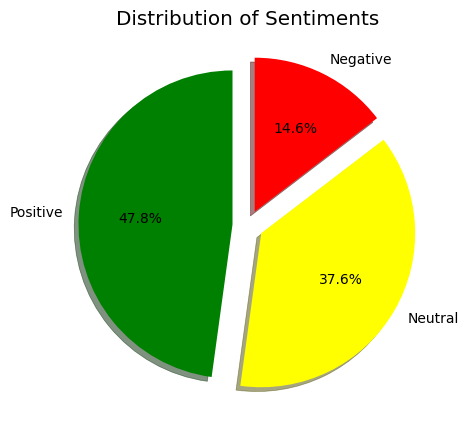

In [23]:
fig = plt.figure(figsize=(5,5))
colors = ("green", "yellow", "red")
tags = chatgpt['sentiment'].value_counts()
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors, startangle=90, explode = (0.1,0.1,0.1), label='')
plt.title('Distribution of Sentiments')

Top tweets for different sentiments

In [24]:
from wordcloud import WordCloud

In [25]:
pos_tweets = chatgpt[chatgpt.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,content,polarity,sentiment
7622,also asked chat gpt best way ask blow job boy ...,1.0,Positive
4049,doesnt matter thoughts ai technologychat gpt n...,1.0,Positive
562,thoughts chatgpt best 11 would changes,1.0,Positive
10899,wont mind paying chat gpt 4 20 connected inter...,1.0,Positive
1234,chatgpt best thing ever happen writers block c...,1.0,Positive


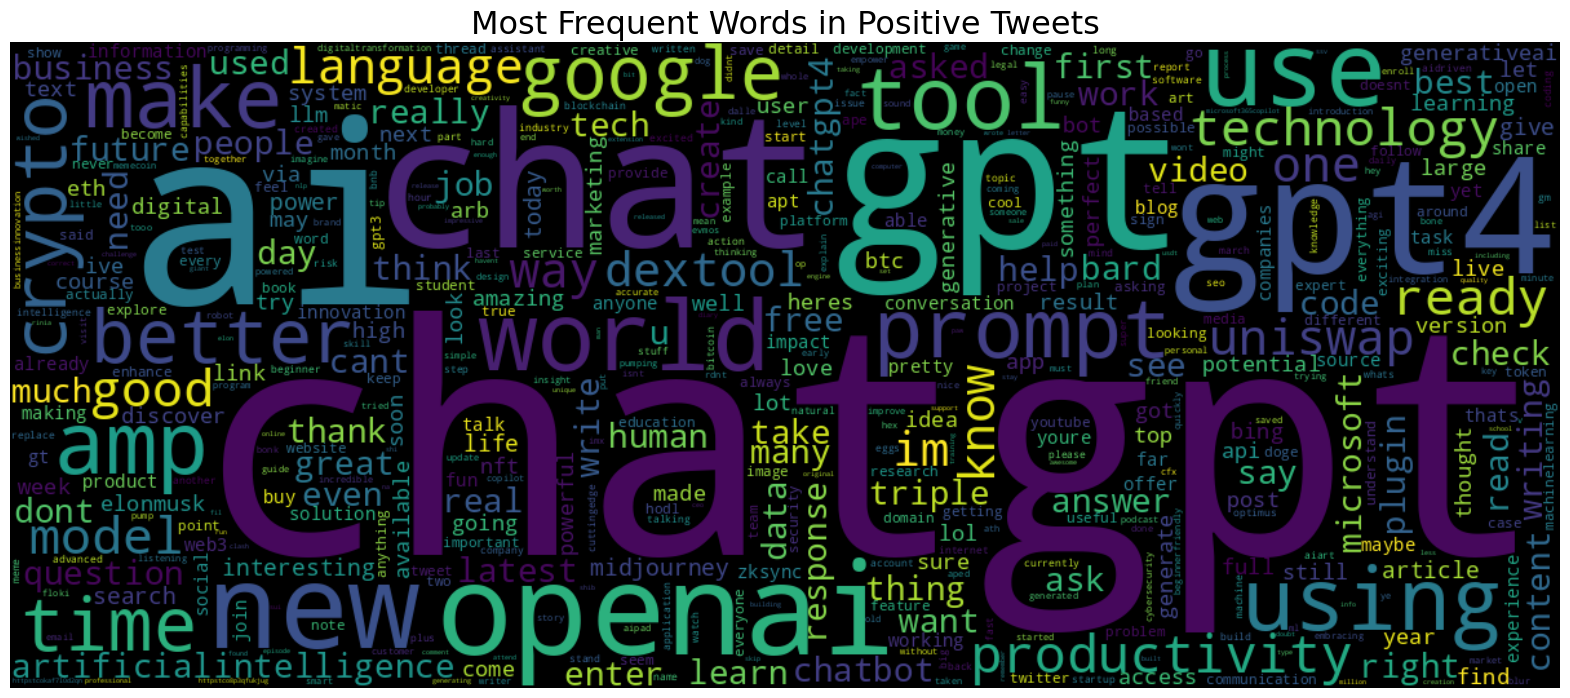

In [26]:
content = ' '.join([word for word in pos_tweets['content']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(collocations=False, max_words=500, width=1200, height=500).generate(content)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Words in Positive Tweets', fontsize=23)
plt.show()

In [27]:
neutral_tweets = chatgpt[chatgpt.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,content,polarity,sentiment
1,mecolehardman4 chat gpt says 15,0.0,Neutral
14448,im attending webinar ai next step digital mark...,0.0,Neutral
14484,chatgpt getting response,0.0,Neutral
14481,chatgpt refused take turing test claiming crea...,0.0,Neutral
14478,google bard chatgpt competitor explained educa...,0.0,Neutral


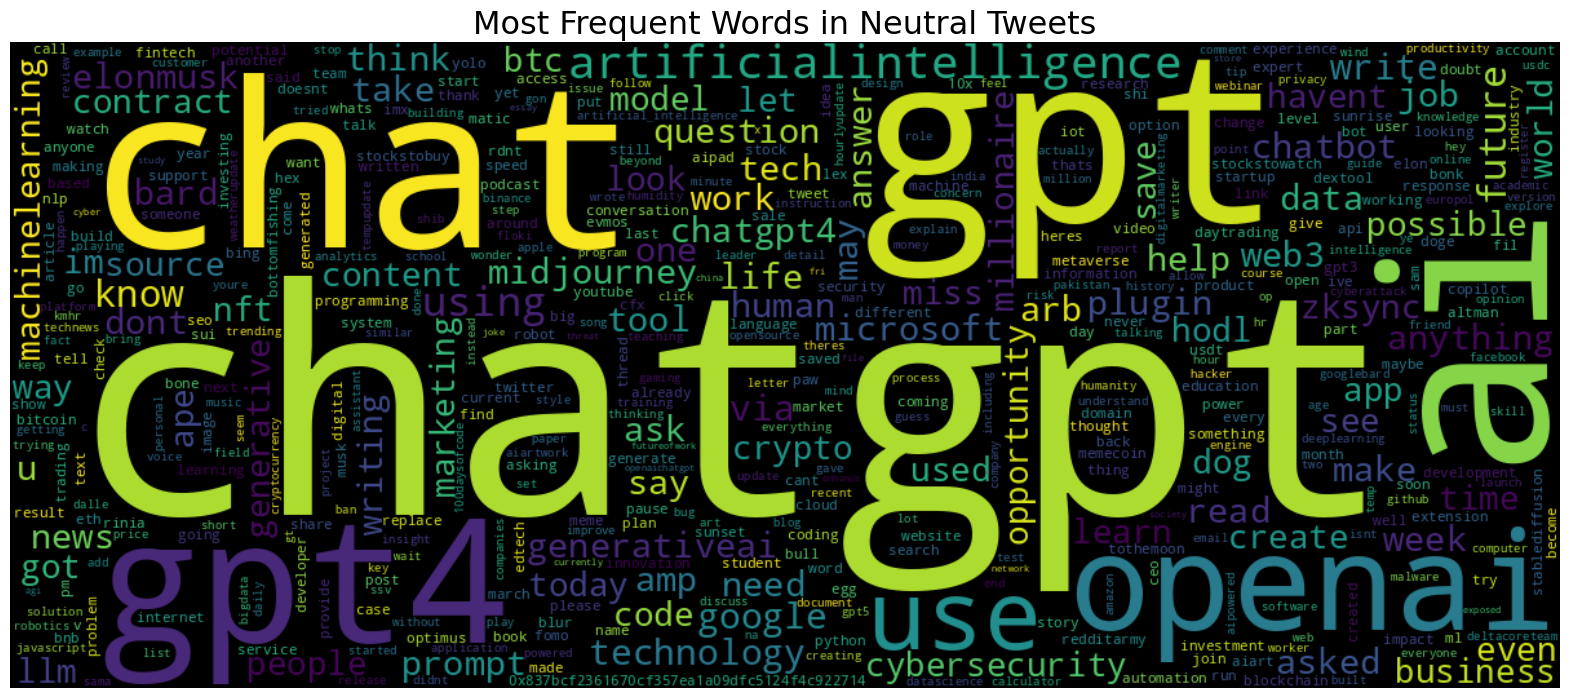

In [28]:
content = ' '.join([word for word in neutral_tweets['content']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(collocations=False, max_words=500, width=1200, height=500).generate(content)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Words in Neutral Tweets', fontsize=23)
plt.show()

In [29]:
neg_tweets = chatgpt[chatgpt.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,content,polarity,sentiment
16524,secret success china china economy chatgpt rea...,-0.000476,Negative
12248,pharmablue even first paragraph 23rds exposure...,-0.002083,Negative
21112,chrismurphyct chat gpt also lies makes grasphs...,-0.002857,Negative
13666,chatgpt tool replacement worked hard marketers...,-0.002976,Negative
15401,im gon na use chatgpt give high people subject...,-0.003333,Negative


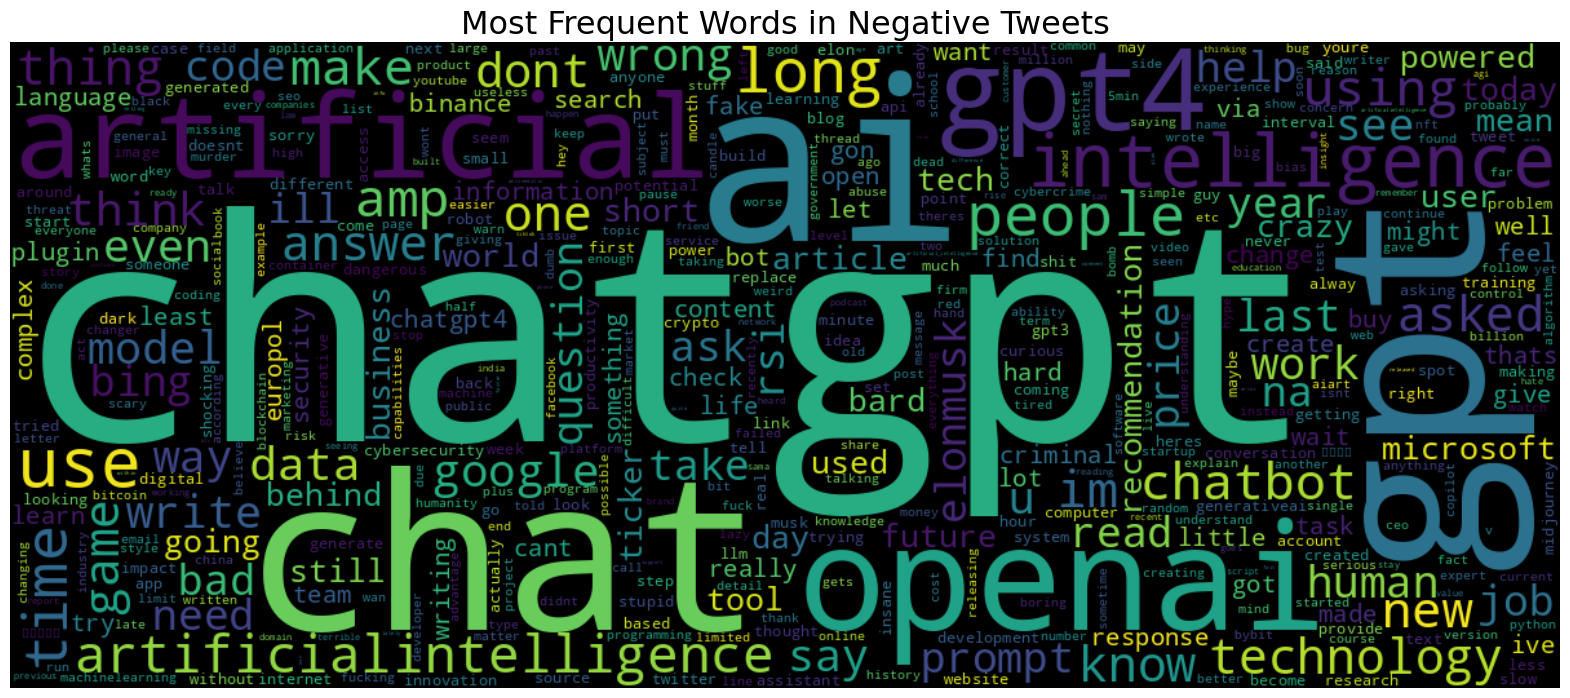

In [30]:
content = ' '.join([word for word in neg_tweets['content']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(collocations=False, max_words=500, width=1200, height=500).generate(content)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Words in Negative Tweets', fontsize=23)
plt.show()

# Text Vectorization
Importing required libraries

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Converting text to numerical vector using vectorization<br> Doing feature extraction to get distinct features out of the text so that the model can train on that

In [32]:
vect = CountVectorizer(ngram_range=(1,2)).fit(chatgpt['content'])

In [33]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 15 features:\n {}".format(feature_names[:15]))

Number of features: 263328

First 15 features:
 ['00' '00 count' '000' '000 2022' '000 2023' '000 30' '000001' '0000498'
 '0000498 rsi' '0000499' '0000499 rsi' '0000598' '0000598 rsi' '00016'
 '00016 buy']


# Building the model

In [34]:
X = chatgpt['content']
Y = chatgpt['sentiment']
X = vect.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
print("x_train size:", (x_train.shape))
print("y_train size:", (y_train.shape))
print("x_test size:", (x_test.shape))
print("y_test size:", (y_test.shape))

x_train size: (17088, 263328)
y_train size: (17088,)
x_test size: (4273, 263328)
y_test size: (4273,)


# Training data on logistic regression model

In [54]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 85.98%


Confusion matrix

In [55]:
print(confusion_matrix(y_test, logreg_pred),"\n")
print(classification_report(y_test, logreg_pred))

[[ 349  141  134]
 [  13 1538   51]
 [  31  229 1787]] 

              precision    recall  f1-score   support

    Negative       0.89      0.56      0.69       624
     Neutral       0.81      0.96      0.88      1602
    Positive       0.91      0.87      0.89      2047

    accuracy                           0.86      4273
   macro avg       0.87      0.80      0.82      4273
weighted avg       0.87      0.86      0.85      4273



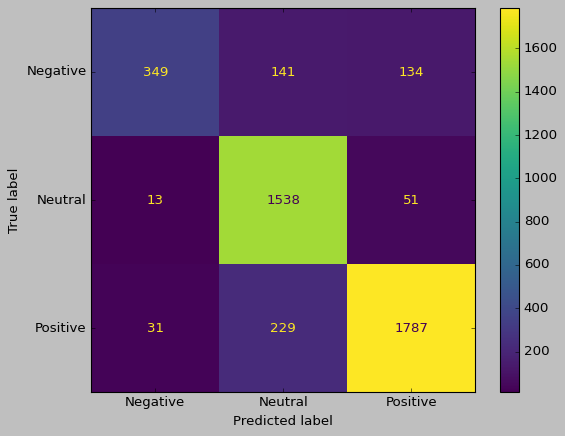

In [56]:
style.use('classic')
confusion_mat = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels=logreg.classes_)
cm_display.plot()

Hyperparameter tuning on C parameter

In [57]:
from sklearn.model_selection import GridSearchCV

Defining the grid of parameters and using GridSearchCV to search through the best parameter values from them



In [58]:
param_grid={'C':[0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10]})

In [59]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 10}


In [60]:
y_pred = grid.predict(x_test)
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 86.89%


There is an improvement in the model accuracy

In [61]:
print(confusion_matrix(y_test, y_pred),"\n")
print(classification_report(y_test, y_pred))

[[ 369  130  125]
 [  11 1543   48]
 [  31  215 1801]] 

              precision    recall  f1-score   support

    Negative       0.90      0.59      0.71       624
     Neutral       0.82      0.96      0.88      1602
    Positive       0.91      0.88      0.90      2047

    accuracy                           0.87      4273
   macro avg       0.88      0.81      0.83      4273
weighted avg       0.87      0.87      0.86      4273



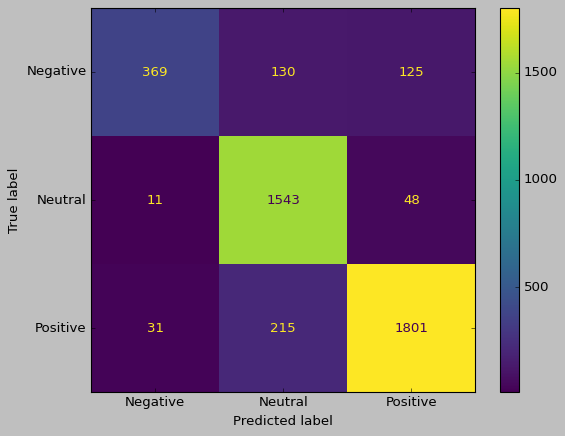

In [62]:
style.use('classic')
confusion_mat_imp = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
cm_display_imp = ConfusionMatrixDisplay(confusion_matrix = confusion_mat_imp, display_labels=logreg.classes_)
cm_display_imp.plot()

# Training data on Support Vector Machine model

In [37]:
from sklearn.svm import LinearSVC

In [38]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 87.92%


In [39]:
print(confusion_matrix(y_test, svc_pred),"\n")
print(classification_report(y_test, svc_pred))

[[ 397  118  109]
 [   9 1551   42]
 [  27  211 1809]] 

              precision    recall  f1-score   support

    Negative       0.92      0.64      0.75       624
     Neutral       0.82      0.97      0.89      1602
    Positive       0.92      0.88      0.90      2047

    accuracy                           0.88      4273
   macro avg       0.89      0.83      0.85      4273
weighted avg       0.89      0.88      0.88      4273



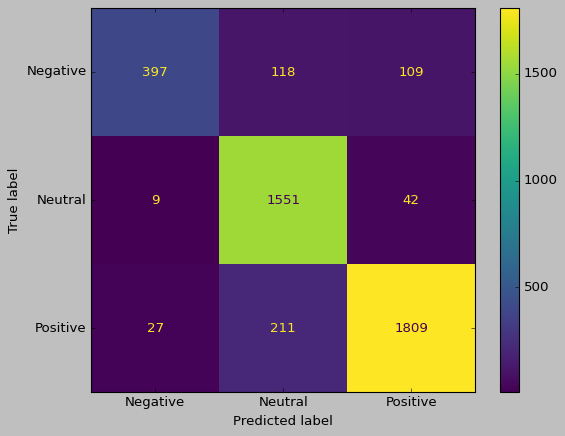

In [42]:
style.use('classic')
confusion_mat_svm = confusion_matrix(y_test, svc_pred, labels=SVCmodel.classes_)
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix = confusion_mat_svm, display_labels=SVCmodel.classes_)
cm_display_svm.plot()

Hyperparameter tuning on C parameter

In [48]:
param_grid_svm = {'C':[0.01, 0.1, 1, 10]}
grid_svm = GridSearchCV(SVCmodel, param_grid_svm)
grid_svm.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.01, 0.1, 1, 10]})

In [49]:
print("Best Parameters:", grid_svm.best_params_)

Best Parameters: {'C': 10}


In [50]:
y_pred_svm = grid_svm.predict(x_test)
svm_acc = accuracy_score(y_pred_svm, y_test)
print("Test accuracy: {:.2f}%".format(svm_acc*100))

Test accuracy: 88.04%


There is an improvement in the model accuracy

In [51]:
print(confusion_matrix(y_test, y_pred_svm),"\n")
print(classification_report(y_test, y_pred_svm))

[[ 399  118  107]
 [   9 1548   45]
 [  26  206 1815]] 

              precision    recall  f1-score   support

    Negative       0.92      0.64      0.75       624
     Neutral       0.83      0.97      0.89      1602
    Positive       0.92      0.89      0.90      2047

    accuracy                           0.88      4273
   macro avg       0.89      0.83      0.85      4273
weighted avg       0.89      0.88      0.88      4273



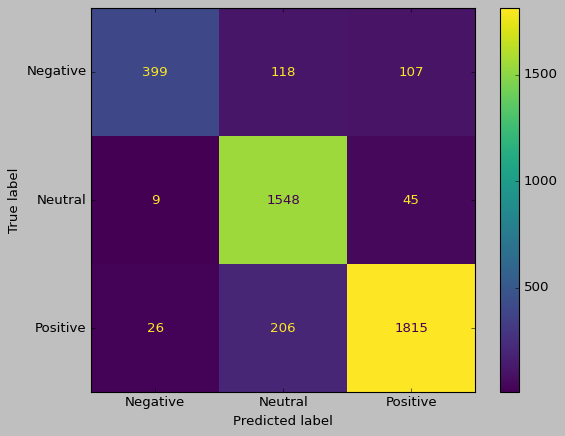

In [53]:
style.use('classic')
confusion_mat_svm_imp = confusion_matrix(y_test, y_pred_svm, labels=SVCmodel.classes_)
cm_display_svm_imp = ConfusionMatrixDisplay(confusion_matrix = confusion_mat_svm_imp, display_labels=SVCmodel.classes_)
cm_display_svm_imp.plot()